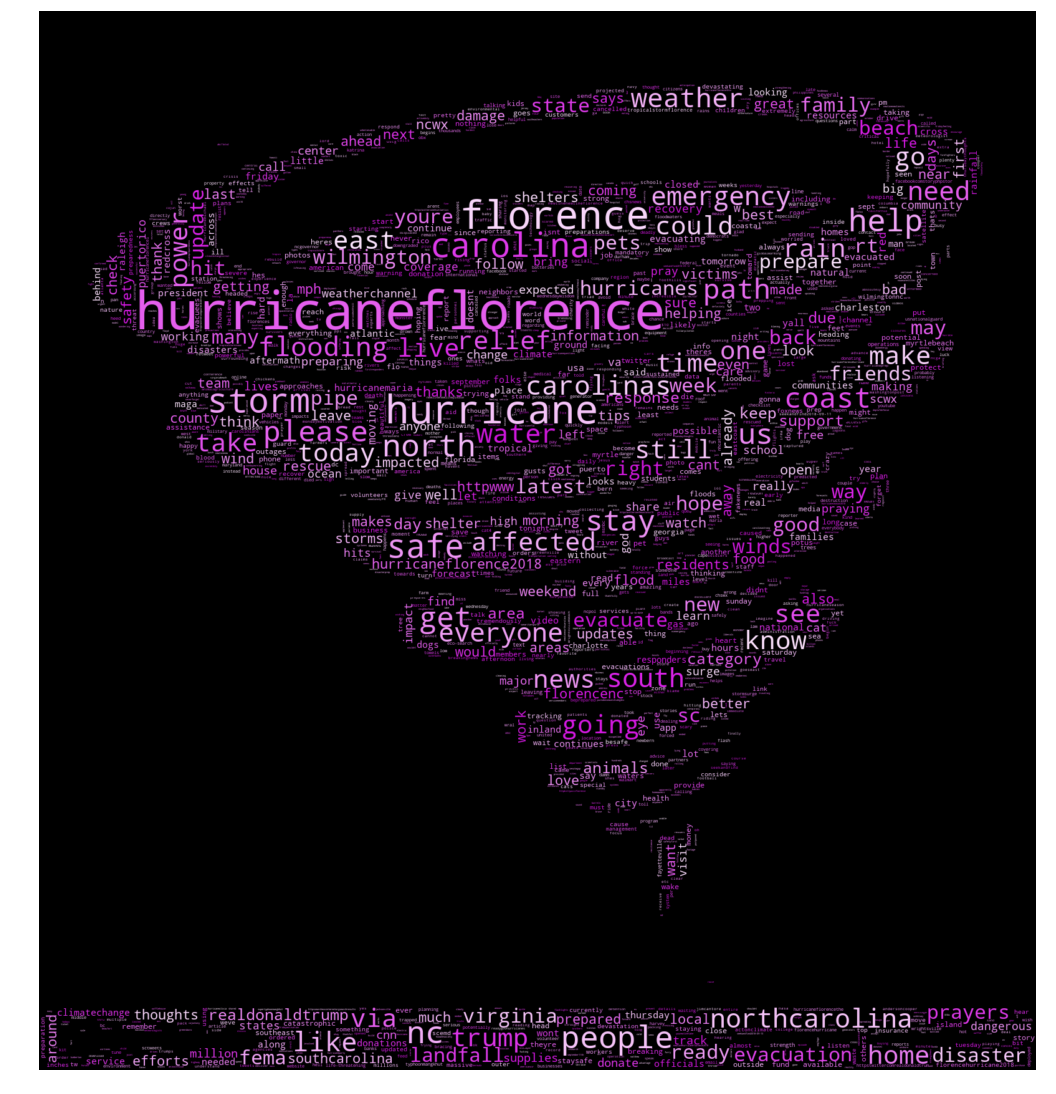

In [4]:
import numpy as np
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator
import csv
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image


stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\', '','
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]


def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()


def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|!:@>?*;/#=_�]', "", w)
    text_lower = wn.lower()

    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)


def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 210.0 / 255.0)
    s = int(100.0 * 205.0 / 255.0)
    l = int(200.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)


def generate_wordcloud(words, mask):
    plt.figure( figsize=(20,15))
    wc = WordCloud(background_color = 'black',width=500,height=500, max_words=5000,mask=mask, 
                   relative_scaling=0.3,collocations=False,stopwords=STOPWORDS,color_func = random_color_func, 
                   normalize_plurals=False).generate_from_frequencies(words)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


def get_wf (file):
    # first get the web page
#     r = requests .get(file)

    r = f.read()    
    # Now clean
    # remove html markup
    t = cleanHtml (r) .lower()   
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
        tw += wf[w] 
        
    
    # Get ordered list
    wfs = dict(tuple(sorted (wf .items(), key = operator.itemgetter(1), reverse=True)))
    ml = min(len(wfs),15)

    mask = np.array(Image.open(requests.get(
        'https://st3.depositphotos.com/14768666/17741/v/1600/depositphotos_177419522-stock-illustration-hurricane-icon-simple-black-style.jpg', 
                                            stream=True).raw))
    generate_wordcloud (wfs,mask)

f = open ('Mega.csv', 'r', encoding="ascii", errors='replace')
get_wf (f)
# print (a)


